In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../Data/Spotify_with_genre.csv')

In [3]:
df.head()

,artist_name,track_name,artist_pop,popularity,release_date,genre,track_uri,artist_uri
0,A Thousand Horses,Preachin' To The Choir,37.0,0.0,2017-06-02,Rap,6JKj9seJCshLVCfBLFp7dS,55RI2GNCfyXr0f14uIdhwd
1,Water Liars,You Work Days I Work Nights,29.0,10.0,2012,dnb,7L7u4PrNt5WMtVI9lHWlLm,6k3UpifDbb2ox25edM5j3P
2,Chambao,Sera,44.0,31.0,2007-11-06,Rap,12EyOqMPMyAKlKSynICAGN,2qhLqZ1pkiUl5HNrU2Nz0R
3,Jeezy,Big Shit Poppin,69.0,19.0,2007-08-07,Rap,3tCDjKseLQJhShfbeg4m7K,4yBK75WVCQXej1p04GWqxH
4,La Arrolladora Banda El Limón De Rene Camacho,No La Voy A Engañar,74.0,54.0,2012,Rap,0UICwSsSpUt98XkeCfupFn,5bSfBBCxY8QAk4Pifveisz


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()

In [6]:
df['artist_name'] = label_encoder.fit_transform(df['artist_name'])
df['genre'] = label_encoder.fit_transform(df['genre'])

In [7]:
df['release_date']=pd.to_datetime(df['release_date'], errors='coerce')

In [8]:
df.dropna(subset=['release_date'], inplace=True)

In [9]:
df['year'] = df['release_date'].dt.year

In [10]:
df.drop(columns=['release_date'], inplace=True)

In [11]:
df.head()

,artist_name,track_name,artist_pop,popularity,genre,track_uri,artist_uri,year
0,34,Preachin' To The Choir,37.0,0.0,1,6JKj9seJCshLVCfBLFp7dS,55RI2GNCfyXr0f14uIdhwd,2017
1,2911,You Work Days I Work Nights,29.0,10.0,2,7L7u4PrNt5WMtVI9lHWlLm,6k3UpifDbb2ox25edM5j3P,2012
2,485,Sera,44.0,31.0,1,12EyOqMPMyAKlKSynICAGN,2qhLqZ1pkiUl5HNrU2Nz0R,2007
3,1268,Big Shit Poppin,69.0,19.0,1,3tCDjKseLQJhShfbeg4m7K,4yBK75WVCQXej1p04GWqxH,2007
4,1525,No La Voy A Engañar,74.0,54.0,1,0UICwSsSpUt98XkeCfupFn,5bSfBBCxY8QAk4Pifveisz,2012


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
numerical_features = ['artist_pop', 'popularity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [15]:
df.head()

,artist_name,track_name,artist_pop,popularity,genre,track_uri,artist_uri,year
0,34,Preachin' To The Choir,0.37,0.000000,1,6JKj9seJCshLVCfBLFp7dS,55RI2GNCfyXr0f14uIdhwd,2017
1,2911,You Work Days I Work Nights,0.29,0.108696,2,7L7u4PrNt5WMtVI9lHWlLm,6k3UpifDbb2ox25edM5j3P,2012
2,485,Sera,0.44,0.336957,1,12EyOqMPMyAKlKSynICAGN,2qhLqZ1pkiUl5HNrU2Nz0R,2007
3,1268,Big Shit Poppin,0.69,0.206522,1,3tCDjKseLQJhShfbeg4m7K,4yBK75WVCQXej1p04GWqxH,2007
4,1525,No La Voy A Engañar,0.74,0.586957,1,0UICwSsSpUt98XkeCfupFn,5bSfBBCxY8QAk4Pifveisz,2012


In [16]:
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS
# from sklearn.preprocessing import StandardScaler

In [17]:
features_for_clustering = ['artist_pop', 'popularity', 'year', 'genre', ]
weights= {'artist_pop': 1, 'popularity': 1, 'year': 1, 'genre': 1, 'artist_name': 1}

X = df[features_for_clustering]

In [18]:
X['artist_pop'] = X['artist_pop']*weights['artist_pop']
X['popularity'] = X['popularity']*weights['popularity']
X['year'] = X['year']*weights['year']

In [19]:
from scipy.spatial.distance import hamming

def weighted_distance(x, y):
    num_dist = np.sqrt(
        weights['artist_pop'] * (x[0] - y[0])**2 +
        weights['popularity'] * (x[1] - y[1])**2 +
        weights['year'] * (x[2] - y[2])**2
    )
    # year_dist = hamming(x[2], y[2])
    genre_dist = hamming(x[3], y[3])
    # artist_dist = hamming(x[4], y[4])
    # genre_dist = np.count_nonzero(x[3], y[3])/len(x[3])
    # artist_dist = np.count_nonzero(x[4], y[4])/len(x[4])
    cat_dist = weights['genre']*genre_dist  #+ weights['artist_name']*artist_dist
    
    # return num_dist  + weights['genre']*genre_dist + weights['artist_name']*artist_dist
    return num_dist + cat_dist


In [20]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2, n_jobs=-1)  

In [21]:
# Adjust eps and min_samples as per your data
hdbscan=HDBSCAN(min_cluster_size=7,min_samples=8 , n_jobs=-1)  #metric=weighted_distance

In [22]:
# Fit DBSCAN clustering
clusters = dbscan.fit_predict(X)

In [23]:
hclusters=hdbscan.fit_predict(X)

In [24]:
# Add cluster labels to dataframe
df['cluster'] = clusters
df['hcluster'] = hclusters

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotClusters(col,algoName):
    for idx,i in enumerate(features_for_clustering):
        for j in features_for_clustering[idx+1:]:
            if i==j:
                continue
            plt.figure(figsize=(6,4))
            sns.scatterplot(data=df,x=i,y=j,hue=col,palette='viridis')
            plt.title(f'{algoName} Clusters')
            plt.show() 
            


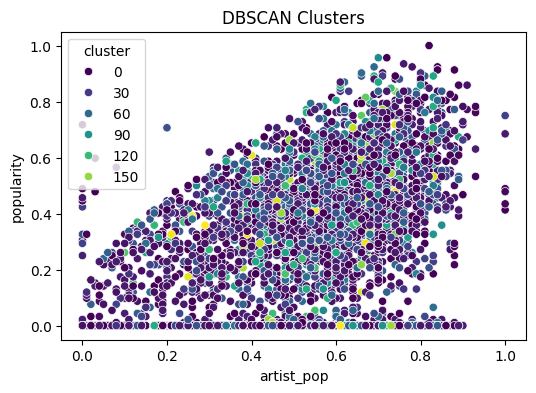

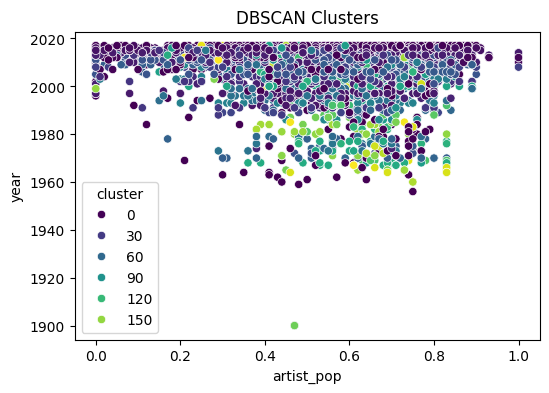

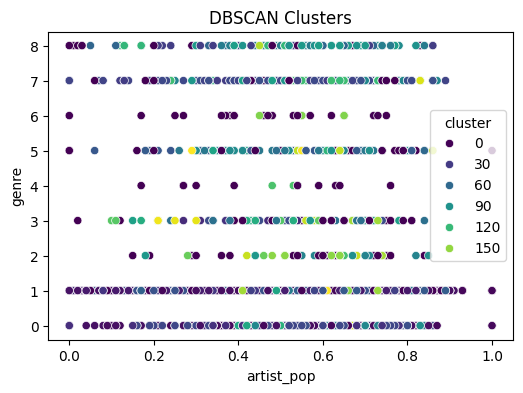

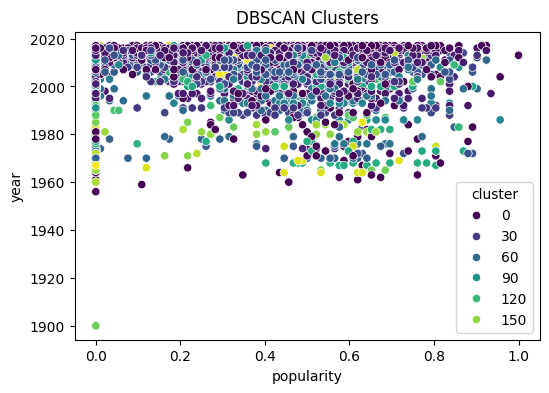

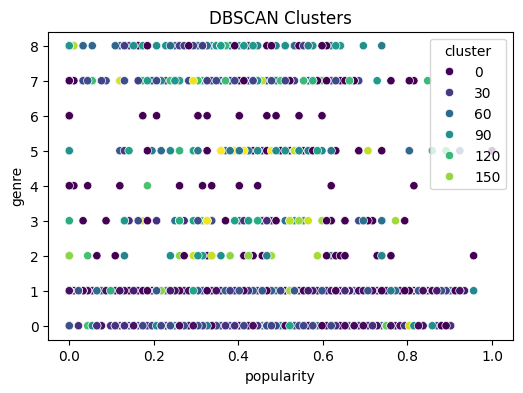

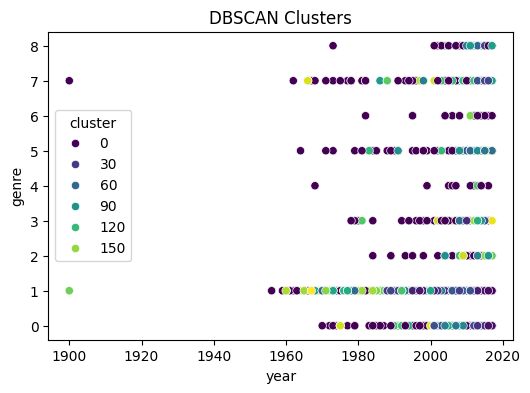

In [26]:
plotClusters('cluster','DBSCAN')

In [27]:
# Calculate centroid values
centroid_values = df.groupby('cluster')[features_for_clustering].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
         artist_pop  popularity    year     genre
cluster                                          
-1         0.521961    0.356405  1995.0  3.980392
 0         0.568000    0.283972  2017.0  1.000000
 1         0.529293    0.250000  2007.0  1.000000
 2         0.569395    0.242724  2012.0  1.000000
 3         0.558438    0.345788  2010.0  0.000000
...             ...         ...     ...       ...
 175       0.300000    0.326087  2012.0  3.000000
 176       0.595000    0.630435  1985.0  1.000000
 177       0.595000    0.445652  2016.0  5.000000
 178       0.610000    0.000000  1967.0  1.000000
 179       0.275000    0.375000  2011.0  5.000000

[181 rows x 4 columns]


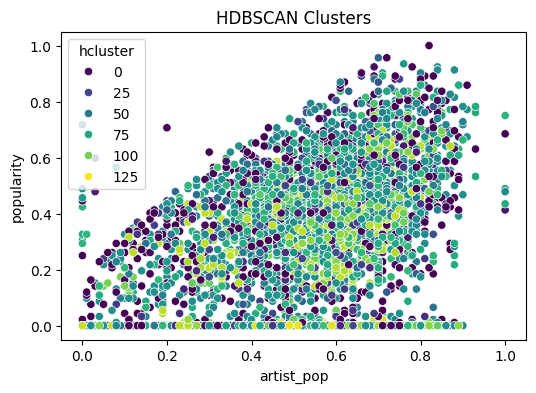

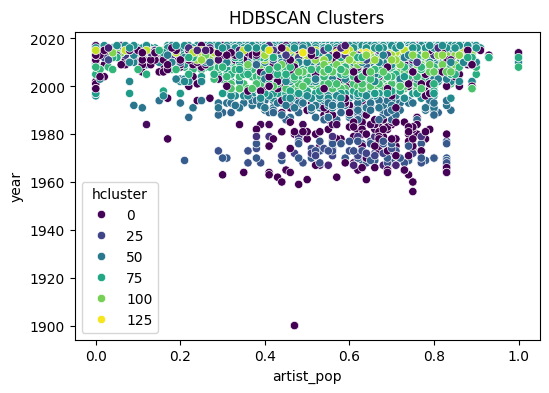

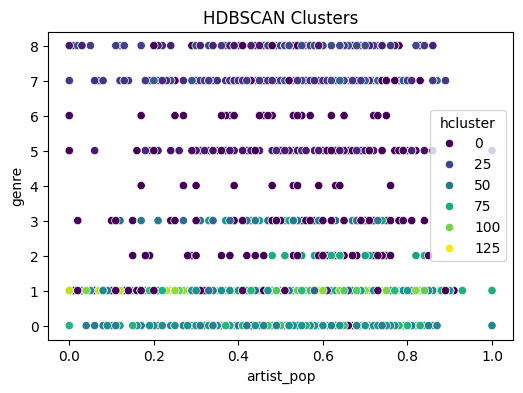

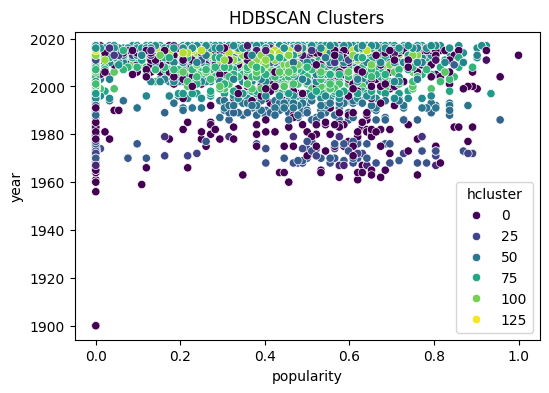

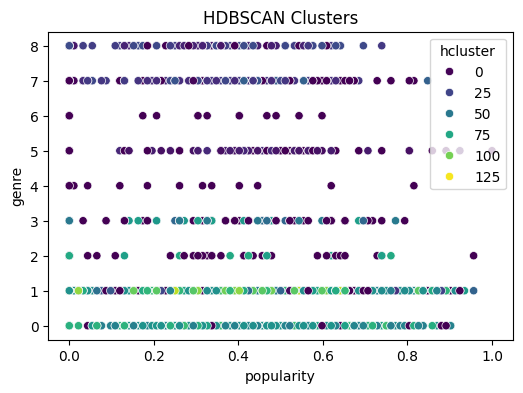

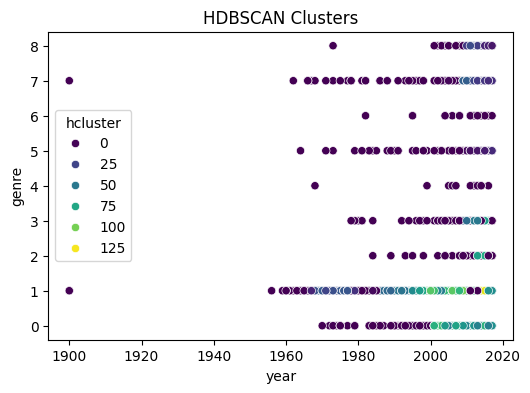

In [28]:
plotClusters('hcluster','HDBSCAN')

In [29]:
centroid_values = df.groupby('hcluster')[features_for_clustering].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
          artist_pop  popularity         year     genre
hcluster                                               
-1          0.513160    0.301051  2004.772843  2.038071
 0          0.702000    0.316667  1964.733333  1.000000
 1          0.529333    0.261594  2004.866667  7.000000
 2          0.538333    0.392210  1983.750000  1.000000
 3          0.583000    0.213043  2010.000000  5.000000
...              ...         ...          ...       ...
 123        0.491154    0.000418  2014.000000  1.000000
 124        0.570476    0.000518  2014.000000  1.000000
 125        0.646429    0.000000  2014.000000  1.000000
 126        0.482000    0.000000  2015.000000  1.000000
 127        0.520000    0.000000  2015.000000  1.000000

[129 rows x 4 columns]


In [30]:
# Count the number of clusters formed
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 180


In [31]:
num_clusters = len(set(hclusters)) - (1 if -1 in hclusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 128


Hierarchical clustering:

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarhical_clusters = hc.fit_predict(X)

In [34]:
#Add cluster labels to dataframe
df['hierarchical_cluster'] = hierarhical_clusters

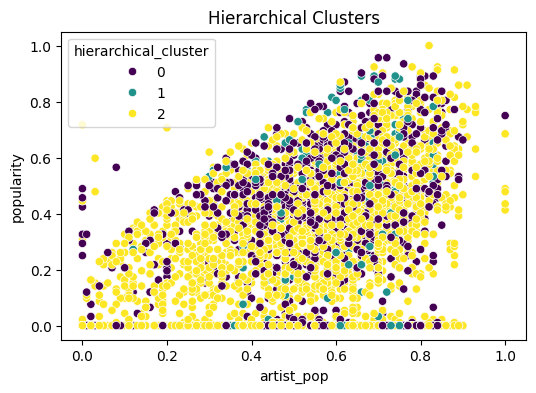

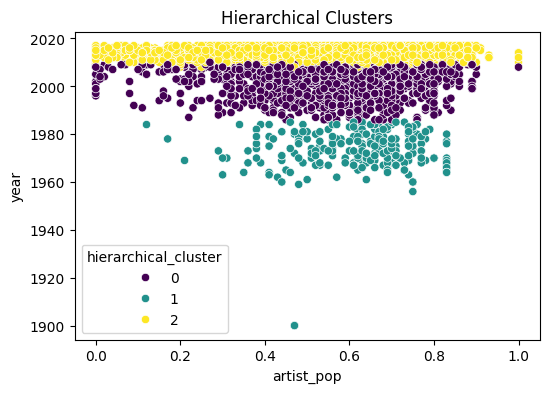

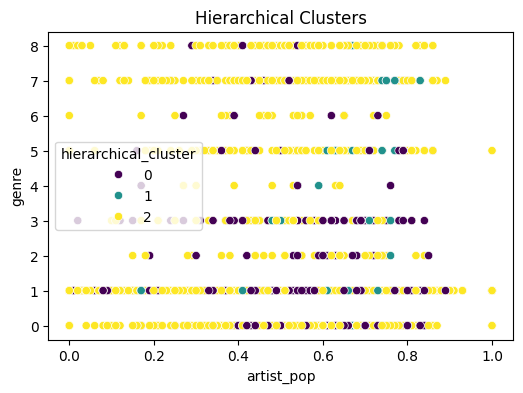

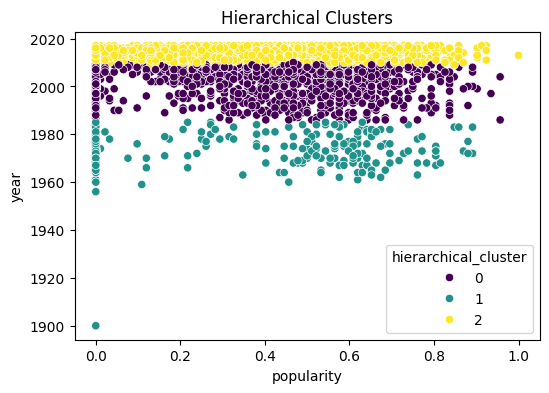

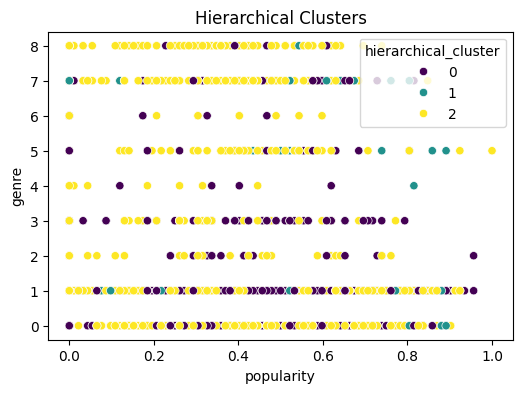

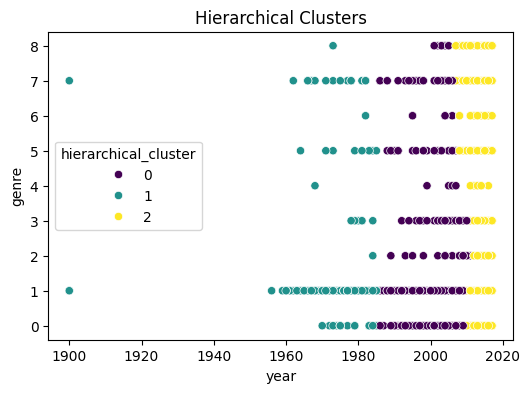

In [35]:
plotClusters('hierarchical_cluster','Hierarchical')

In [36]:
# Count the number of clusters formed
num_clusters_hc = len(set(hierarhical_clusters))
print("Number of clusters formed by hierarchical clustering:", num_clusters_hc)

Number of clusters formed by hierarchical clustering: 3


In [37]:
optics=OPTICS(min_samples=6,min_cluster_size=5)  # metric=weighted_distance

In [38]:
optics_clusters=optics.fit_predict(X)

In [39]:
df['ocluster'] = optics_clusters


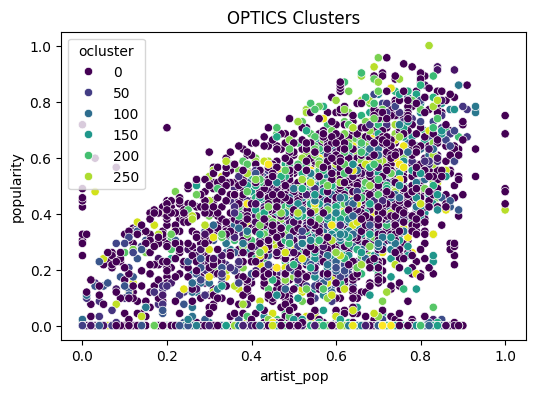

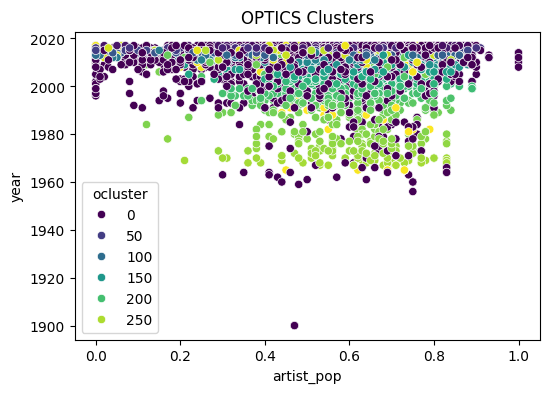

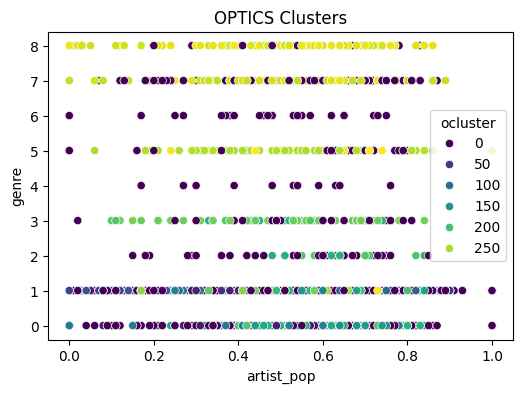

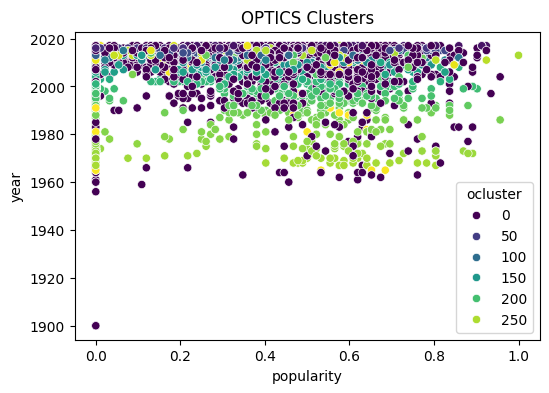

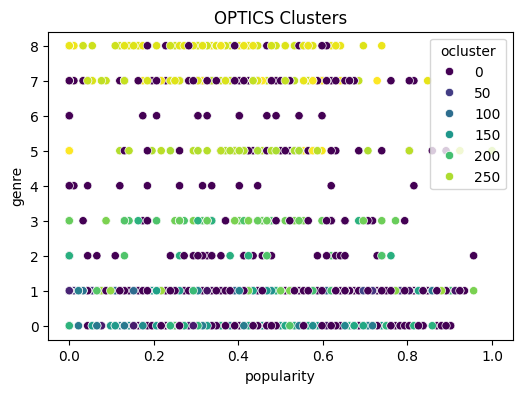

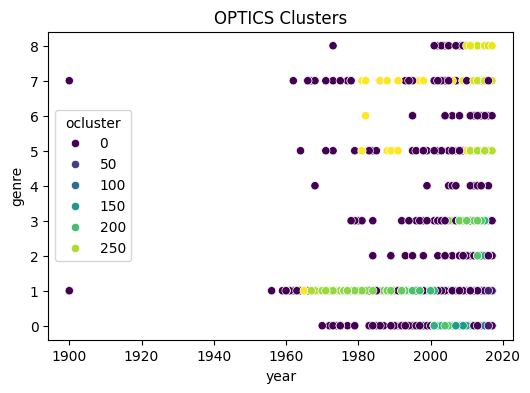

In [40]:
plotClusters('ocluster','OPTICS')

In [41]:
# Count the number of clusters formed
num_clusters_optics = len(set(optics_clusters)) - (1 if -1 in optics_clusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed by OPTICS:", num_clusters_optics)

Number of clusters formed by OPTICS: 286


In [42]:
# Calculate centroid values
centroid_values = df.groupby('ocluster')[features_for_clustering].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
          artist_pop  popularity         year     genre
ocluster                                               
-1          0.536982    0.320748  2009.426940  1.435983
 0          0.380000    0.000000  2017.000000  1.000000
 1          0.436667    0.001208  2017.000000  1.000000
 2          0.601111    0.000000  2017.000000  1.000000
 3          0.641250    0.000000  2017.000000  1.000000
...              ...         ...          ...       ...
 281        0.523333    0.322464  2006.000000  7.000000
 282        0.701818    0.229249  1965.000000  1.000000
 283        0.722000    0.228261  1981.600000  6.400000
 284        0.684000    0.186957  1997.200000  7.000000
 285        0.595455    0.342885  1989.272727  5.727273

[287 rows x 4 columns]


In [43]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

algoNames=['DBSCAN','HDBSCAN','Hierarchical','OPTICS','Birch']
cols=['Silhouette Score', 'Davies Bouldin Score', 'Calinski Harabasz Score' , 'Adjusted Rand Score', 'Homogeneity Score', 'Completeness Score', 'V Measure Score']
 
results = pd.DataFrame(columns=cols, index=algoNames)

def evalClusteringAlgo(algoName,clusters,features=features_for_clustering):
    silhouette = silhouette_score(df[features], clusters)
    davies_bouldin = davies_bouldin_score(df[features], clusters)
    calinski_harabasz = calinski_harabasz_score(df[features], clusters)
    adjusted_rand = adjusted_rand_score(df['genre'], clusters)
    homogeneity = homogeneity_score(df['genre'], clusters)
    completeness = completeness_score(df['genre'], clusters)
    v_measure = v_measure_score(df['genre'], clusters)
    results.loc[algoName] = [silhouette, davies_bouldin, calinski_harabasz, adjusted_rand, homogeneity, completeness, v_measure]
    
    

In [44]:
evalClusteringAlgo('DBSCAN',clusters)
evalClusteringAlgo('HDBSCAN',hclusters)
evalClusteringAlgo('Hierarchical',hierarhical_clusters) 
evalClusteringAlgo('OPTICS',optics_clusters)

results.head()

,Silhouette Score,Davies Bouldin Score,Calinski Harabasz Score,Adjusted Rand Score,Homogeneity Score,Completeness Score,V Measure Score
DBSCAN,0.580087,1.320902,221.14383,0.049449,0.910357,0.225751,0.361786
HDBSCAN,0.360193,1.88681,92.189728,0.0188,0.783952,0.192952,0.309683
Hierarchical,0.577189,0.577712,10427.599428,-0.034877,0.014405,0.017945,0.015981
OPTICS,-0.028908,1.770531,29.109067,0.040631,0.62934,0.157178,0.251536
Birch,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:

from sklearn.cluster import HDBSCAN, OPTICS, SpectralClustering, Birch, AgglomerativeClustering
#AffinityPropagation, MeanShift,

In [46]:
# Initialize clustering algorithms
hdbscan = HDBSCAN(min_cluster_size=7, min_samples=8, cluster_selection_method='eom')
optics = OPTICS(min_samples=6, min_cluster_size=5)
birch = Birch(n_clusters=3)
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
# spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10)

In [47]:
#combine all clustering algorithms
clustering_algorithms = (
    ('HDBSCAN', hdbscan),
    ('OPTICS', optics),
    ('Birch', birch),
    ('Agglomerative', agglomerative),
    # ('Spectral', spectral)
)

# Iterate over each clustering algorithm
for name, algorithm in clustering_algorithms:
    # Fit the algorithm to the data
    clusters = algorithm.fit_predict(X)
    # Calculate silhouette score
    silhouette = silhouette_score(X, clusters)
    # Print the score
    print(f'Silhouette score for {name}:', silhouette)
    
    # Add cluster labels to dataframe
    df[name] = clusters


Silhouette score for HDBSCAN: 0.3601933700208087
Silhouette score for OPTICS: -0.028908226229101885
Silhouette score for Birch: 0.641043201880745
Silhouette score for Agglomerative: 0.5771894355576237


In [48]:
import pickle

# Save the model
with open('../Models/hdbscan.pkl', 'wb') as file:
    pickle.dump(hdbscan, file)

with open('../Models/optics.pkl', 'wb') as file:
    pickle.dump(optics, file)

with open('../Models/birch.pkl', 'wb') as file:
    pickle.dump(birch, file)
